In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
print(tf.__version__)

2.1.0


In [4]:
loan_data = pd.read_csv('loan_data.csv')

In [5]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loan_data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [8]:
# Feature Transformation: Transform categorical values into numerical values (discrete)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(loan_data['purpose'])
le.transform(loan_data['purpose'])
le.classes_

loan_data['purpose'] = le.fit_transform(loan_data['purpose'])


In [9]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
loan_data.shape

(9578, 14)

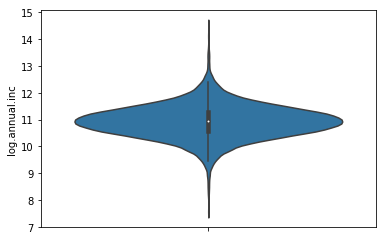

In [11]:
# Exploratory data analysis of different factors of the dataset.
# module in Python built on top of matplotlib designed for statistical plotting.
sns.violinplot(y='log.annual.inc',hue='not.fully.paid',data=loan_data)

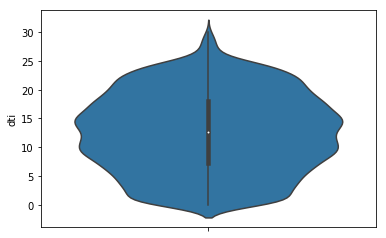

In [12]:
sns.violinplot(y='dti',hue='not.fully.paid',data=loan_data)

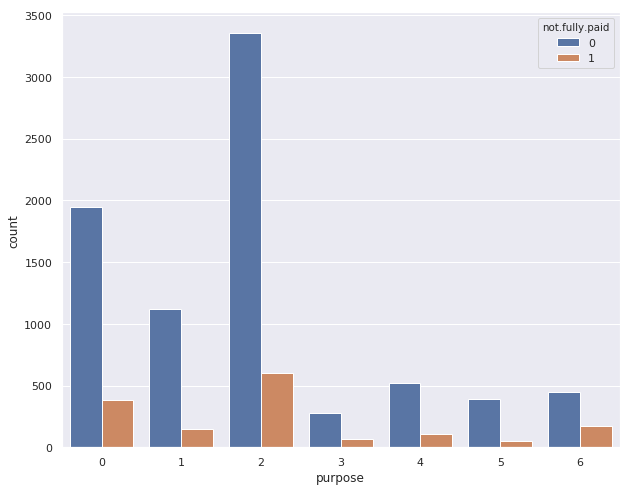

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data=loan_data,x='purpose',hue='not.fully.paid')

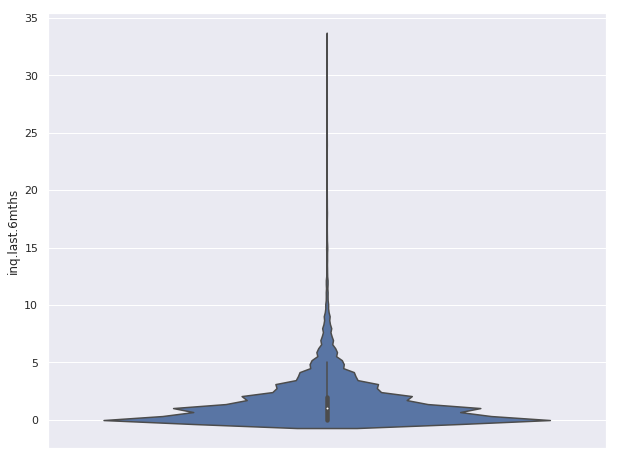

In [14]:
sns.violinplot(y='inq.last.6mths',hue='not.fully.paid',data=loan_data)

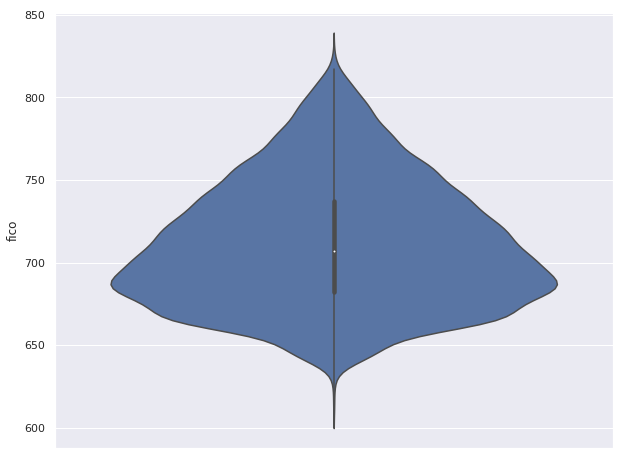

In [15]:
sns.violinplot(y=loan_data['fico'],hue=loan_data['not.fully.paid'])

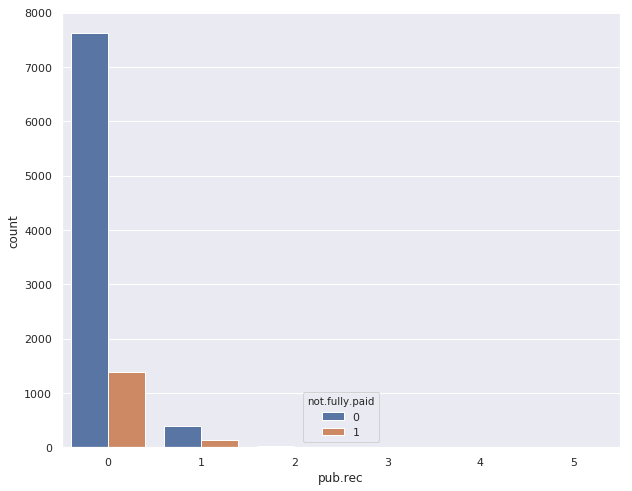

In [16]:
sns.countplot(x='pub.rec',hue='not.fully.paid',data=loan_data)

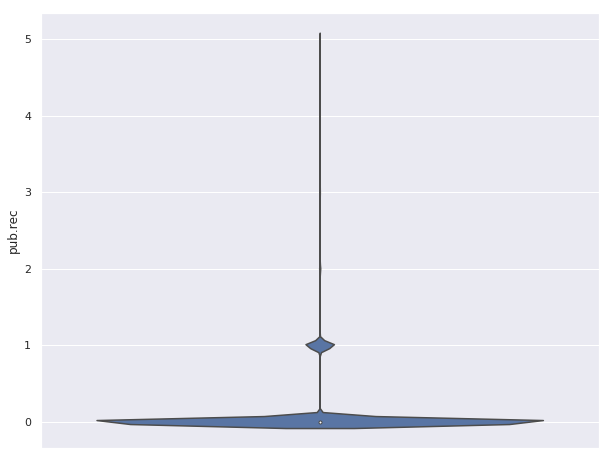

In [17]:
sns.violinplot(y=loan_data['pub.rec'],hue=loan_data['not.fully.paid'])

In [21]:
input_matrix = np.loadtxt("input.csv", delimiter=",", ndmin=2).astype(np.float32)
input_matrix.shape

(9578, 18)

In [22]:
type(input_matrix[0][0])

numpy.float32

In [26]:
labels = np.loadtxt("output.csv", delimiter=",", ndmin=2).astype(np.float32)
labels.shape

(9578, 2)

In [27]:
type(labels[0][0])

numpy.float32

In [28]:
from math import floor,ceil

## Splitting data into training and testing set

In [31]:
train_size = 0.75
#we have used 75% of total data as training set
train_cnt = floor(input_matrix.shape[0] * train_size)
x_train = input_matrix[0:train_cnt]
y_train = labels[0:train_cnt]
x_test = input_matrix[train_cnt:]
y_test = labels[train_cnt:]

In [32]:
x_train.shape

(7183, 18)

In [33]:
y_train.shape

(7183, 2)

In [34]:
x_test.shape

(2395, 18)

In [35]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
y_test.shape

(2395, 2)

# Creating Model

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(777)

#keras Sequential model is being used here
model = Sequential()

# For 2D layers, such as Dense we specify input shape via the argument input_dim,
# For 3D  layers we use the arguments input_dim and input_length
# We are using relu function as activation function for our neural network
model.add(Dense(12, input_dim=18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
# One Epoch is when an entire dataset is passed forward and backward through the neural network only once.
# Total number of training examples present in a single batch.

model.fit(x_train, y_train, epochs=200, batch_size=10)

# Evaluation of model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Using TensorFlow backend.


Epoch 1/200
7183/7183 [==============================] - 1s 206us/step - loss: 81.5571 - accuracy: 0.8225
Epoch 2/200
7183/7183 [==============================] - 1s 95us/step - loss: 3.1694 - accuracy: 0.8922
Epoch 3/200
7183/7183 [==============================] - 1s 92us/step - loss: 3.7778 - accuracy: 0.8968
Epoch 4/200
7183/7183 [==============================] - 1s 91us/step - loss: 3.0051 - accuracy: 0.8980
Epoch 5/200
7183/7183 [==============================] - 1s 88us/step - loss: 3.5204 - accuracy: 0.8967
Epoch 6/200
7183/7183 [==============================] - 1s 87us/step - loss: 2.7664 - accuracy: 0.8999
Epoch 7/200
7183/7183 [==============================] - 1s 88us/step - loss: 2.5793 - accuracy: 0.9001
Epoch 8/200
7183/7183 [==============================] - 1s 87us/step - loss: 2.5970 - accuracy: 0.9030
Epoch 9/200
7183/7183 [==============================] - 1s 89us/step - loss: 2.3303 - accuracy: 0.9039
Epoch 10/200
7183/7183 [==============================] - 1s 8

In [37]:
#model score
predictions = model.predict(x_test)
y_rounded = [round(x[0]) for x in predictions]
scores_test = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

2395/2395 [==============================] - 0s 11us/step

accuracy: 93.67%
